Discretize PV row sides and indexing
==============================

In this section, we will learn how to:

- create a PV array with discretized PV row sides
- understand the indices of the timeseries surfaces of a PV array
- plot a PV array with indices shown on plot

Imports and settings

In [1]:
# Import external libraries
import matplotlib.pyplot as plt

# Settings
%matplotlib inline

### Prepare PV array parameters

In [2]:
pvarray_parameters = {
    'n_pvrows': 3,            # number of pv rows
    'pvrow_height': 1,        # height of pvrows (measured at center / torque tube)
    'pvrow_width': 1,         # width of pvrows
    'axis_azimuth': 0.,       # azimuth angle of rotation axis
    'surface_tilt': 20.,      # tilt of the pv rows
    'surface_azimuth': 270.,   # azimuth of the pv rows front surface
    'solar_zenith': 40.,      # solar zenith angle
    'solar_azimuth': 150.,    # solar azimuth angle
    'gcr': 0.5,               # ground coverage ratio
}

### Create discretization scheme

In [3]:
discretization = {'cut':{
    0: {'back': 5},  # discretize the back side of the leftmost PV row into 5 segments
    1: {'front': 3}  # discretize the front side of the center PV row into 3 segments
}}
pvarray_parameters.update(discretization)

### Create a PV array

Import the ``OrderedPVArray`` class and create a PV array object using the parameters above

In [4]:
from pvfactors.geometry import OrderedPVArray
# Create pv array
pvarray = OrderedPVArray.fit_from_dict_of_scalars(pvarray_parameters)

Plot the PV array at index ``0``

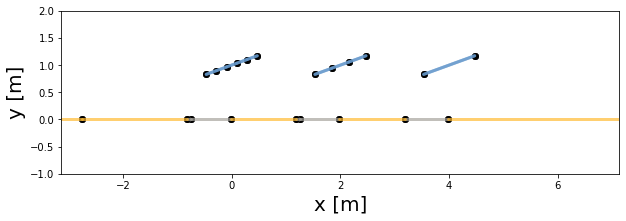

In [5]:
# Plot pvarray shapely geometries
f, ax = plt.subplots(figsize=(10, 3))
pvarray.plot_at_idx(0, ax)
plt.show()

As we can see, there is some discretization on the leftmost and the center PV rows.  
We can check that it was correctly done using the ``pvarray`` object.

In [6]:
pvrow_left = pvarray.ts_pvrows[0]
n_segments = len(pvrow_left.back.list_segments)
print("Back side of leftmost PV row has {} segments".format(n_segments))

Back side of leftmost PV row has 5 segments


In [7]:
pvrow_center = pvarray.ts_pvrows[1]
n_segments = len(pvrow_center.front.list_segments)
print("Front side of center PV row has {} segments".format(n_segments))

Front side of center PV row has 3 segments


### Indexing the timeseries surfaces in a PV array

In order to perform some calculations on PV array surfaces, it is often important to index them.  
``pvfactors`` takes care of this.

We can for instance check the index of the timeseries surfaces on the front side of the center PV row

In [8]:
# List some indices
ts_surface_list = pvrow_center.front.all_ts_surfaces
print("Indices of surfaces on front side of center PV row")
for ts_surface in ts_surface_list:
    index = ts_surface.index
    print("... surface index: {}".format(index))

Indices of surfaces on front side of center PV row
... surface index: 40
... surface index: 41
... surface index: 42
... surface index: 43
... surface index: 44
... surface index: 45


Intuitively, one could have expected only 3 timeseries surfaces because that's what the previous plot at index ``0`` was showing.
But it is important to understand that ALL timeseries surfaces are created at PV array fitting time, even the ones that don't exist for the given timestamps.
So in this example: 
- we have 3 illuminated timeseries surfaces, which do exist at timestamp ``0``
- and 3 shaded timeseries surfaces, which do NOT exist at timestamp ``0`` (so they have zero length).

Let's check that.

In [9]:
for ts_surface in ts_surface_list:
    index = ts_surface.index
    shaded = ts_surface.shaded
    length = ts_surface.length
    print("Surface with index: '{}' has shading status '{}' and length {} m".format(index, shaded, length))

Surface with index: '40' has shading status 'False' and length [0.33333333] m
Surface with index: '41' has shading status 'True' and length [0.] m
Surface with index: '42' has shading status 'False' and length [0.33333333] m
Surface with index: '43' has shading status 'True' and length [0.] m
Surface with index: '44' has shading status 'False' and length [0.33333333] m
Surface with index: '45' has shading status 'True' and length [0.] m


As expected, all shaded timeseries surfaces on the front side of the PV row have length zero.

### Plot PV array with indices

It is possible also to visualize the PV surface indices of all the non-zero surfaces when plotting a PV array, for a given timestamp (here at the first timestamp, so ``0``).

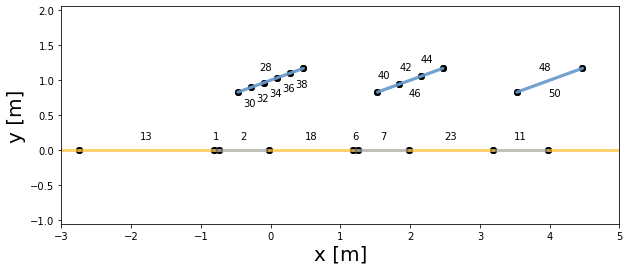

In [10]:
# Plot pvarray shapely geometries with surface indices
f, ax = plt.subplots(figsize=(10, 4))
pvarray.plot_at_idx(0, ax, with_surface_index=True)
ax.set_xlim(-3, 5)
plt.show()

As shown above, the surfaces on the front side of the center PV row have indices 40, 42, and 44.